In [1]:
import os
import numpy as np
import glob
import random
from PIL import Image
import matplotlib.pyplot as plt

In [67]:
ROOM_PATH = "../data/original_data/rooms_from_basement_renovator/"
ALTAR_PATH = "../data/derived_data/item_altars/"
ITEM_PATH = "../data/original_data/items/"
DERIVED_ROOM_PATH = "../data/derived_data/rooms/"

os.makedirs(DERIVED_ROOM_PATH, exist_ok=True)

In [3]:
glob.glob(f"{ROOMS_PATHS}/*")

['../data/original_data/rooms_from_basement_renovator/01_basement',
 '../data/original_data/rooms_from_basement_renovator/13_sheol',
 '../data/original_data/rooms_from_basement_renovator/16_chest',
 '../data/original_data/rooms_from_basement_renovator/09_womb',
 '../data/original_data/rooms_from_basement_renovator/02_cellar',
 '../data/original_data/rooms_from_basement_renovator/04_caves',
 '../data/original_data/rooms_from_basement_renovator/03_burning basement',
 '../data/original_data/rooms_from_basement_renovator/08_dank depths',
 '../data/original_data/rooms_from_basement_renovator/06_depths',
 '../data/original_data/rooms_from_basement_renovator/12_blue womb',
 '../data/original_data/rooms_from_basement_renovator/05_catacombs',
 '../data/original_data/rooms_from_basement_renovator/00_special_rooms',
 '../data/original_data/rooms_from_basement_renovator/10_utero',
 '../data/original_data/rooms_from_basement_renovator/14_cathedral',
 '../data/original_data/rooms_from_basement_renov

In [144]:
def put_in_room(room, obj, coordinates = (0,0), margin_width = 52, margin_height = 53):
    """
    Put in the given room the given object.
    
    Parameters:
        - room (PIL image): PIL image of the room.
        - obj (PIL image): PIL image of the item combined with the altar.
        - coordinates (tuple): cell to put the object in.
        - margin_width: the room is divided in cells to create a 13x7 grid. This margin
            is used to avoid the room walls.
        - margin_height: same as margin_width.
    """
    
    # Each cell is 26x26 pixels    
    
    print(margin_height + (coordinates[1] * 26))
    
    dest = margin_width + (coordinates[0] * 26), margin_height + (coordinates[1] * 26)
    room.alpha_composite(obj, dest=dest)
    

def combine_item_with_altar(altar, item):
    """
    Creates a new image combining the given altar and item.
    
    Parameters:
        - altar (PIL image): PIL image of the altar.
        - item (PIL image): PIL image of the item to put on top of 
            the given altar.
    """
    
    combined_height = altar.height + item.height
    combined_image = Image.new("RGBA", (altar.width, combined_height))
    
    item_margin_top = random.randint(0, 3)
    
    combined_image.paste(item, (-2, item_margin_top))
    combined_image.paste(altar, (0, item.height))
    
    return combined_image

In [145]:
altar_name = "item_altar_001"
item_name = "1up!"
room_name = "03_burning basement"
room_idx = "01"

room = Image.open(f"{ROOM_PATH}/{room_name}/{room_idx}.png")
altar = Image.open(f"../data/derived_data/item_altars/{altar_name}.png")
item = Image.open(f"../data/original_data/items/{item_name}.png")

In [146]:
obj = combine_item_with_altar(altar, item)
obj.convert("RGB")

In [147]:
item.height

32

In [148]:
for i in range(13):
    for j in range(7):
        put_in_room(room, obj, coordinates=(i,j), margin_height=53-32)

21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177
21
47
73
99
125
151
177


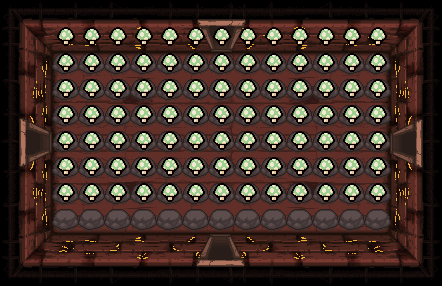

In [143]:
room.convert("RGB")